<a href="https://colab.research.google.com/github/ChintanThacker/Facial_Expression_EfficientNet/blob/master/EfficientNet_without_trainable_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# a = []
# while(1):
#  a.append('1')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tensorflow import keras
from glob import glob
from tqdm import notebook
from sklearn import preprocessing
from keras import Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import sys, os
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.models import model_from_json

Using TensorFlow backend.


In [5]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-yhq3eqxb
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-yhq3eqxb
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18327 sha256=2e4685522149103b584930b324caf02d77a116a00b6c0bff34430649fa8fb3e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-kxh080o6/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [0]:
from efficientnet.keras import EfficientNetB7
from efficientnet.keras import preprocess_input

In [0]:
train = '/content/drive/My Drive/train/'
#test = '/content/drive/My Drive/dataset/test'

In [8]:
#del model
eff_net = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

258441216/258434480 [==============================] - 17s 0us/step


In [9]:
x = eff_net.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=eff_net.input, outputs=predictions)

# fix the feature extraction part of the model
# fix the feature extraction part of the model
for layer in eff_net.layers:
    layer.trainable = False

model.compile(optimizers.rmsprop(lr=0.0001, decay=0.0001/50),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 64) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [0]:
# x = eff_net.output
# x = Flatten()(x)
# x = Dense(1024, activation="relu")(x)
# x = Dropout(0.5)(x)
# predictions = Dense(7, activation="softmax")(x)
# model = Model(input = eff_net.input, output = predictions)
# model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [0]:
class DataLoader():
  def __init__(self, path):
    self.path = path
  
  def preprocessing(self,instancePath):
    image = load_img(instancePath, target_size=(224, 224))
    image = img_to_array(image)
    image /= 255.0
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image

  def prepare_train_data(self):
    X_train = []
    y_train = []

    for class_folder_name in os.listdir(self.path):
      class_folder_path = os.path.join(self.path, class_folder_name)
      for img in notebook.tqdm(os.listdir(class_folder_path)):
        imgpath = os.path.join(class_folder_path, img)
        img = self.preprocessing(imgpath)
        X_train.append(img)
        y_train.append(class_folder_name)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train)
    print(np.unique(y_train))   

    print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')
    return X_train,y_train

In [0]:
# X_train = []
# y_train = []
# dl = DataLoader(path = train)
# X_train, y_train = dl.prepare_train_data()

In [0]:
import numpy as np
#np.save('/content/drive/My Drive/EfficientNet/X_train.npy', X_train)
#np.save('/content/drive/My Drive/EfficientNet/y_train.npy', y_train)

In [0]:
#print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')

In [0]:
X_train = np.load('/content/drive/My Drive/EfficientNet/X_train.npy')
y_train = np.load('/content/drive/My Drive/EfficientNet/y_train.npy')

In [14]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')

X_train shape:(2900, 224, 224, 3)
Y_train shape:(2900, 7)


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.16, random_state=42) # Want a balanced split for all the classes
# for train_index, test_index in sss.split(x_train, y_train):
#     print("Using {} for training and {} for validation".format(len(train_index), len(test_index)))
#     x_train, x_valid = x_train[train_index], x_train[test_index]
#     y_train, y_valid = y_train[train_index], y_train[test_index]


print(f'X_train shape:{x_train.shape}\nY_train shape:{y_train.shape}\nX_valid shape:{x_valid.shape}\nY_valid shape:{y_valid.shape}')

X_train shape:(2610, 224, 224, 3)
Y_train shape:(2610, 7)
X_valid shape:(290, 224, 224, 3)
Y_valid shape:(290, 7)


In [0]:
nb_epoch = 50
learning_rate = 0.0001
batch_size = 6
weights="/content/drive/My Drive/EfficientNet/effiwithoutBNM.h5"
callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]

In [0]:
#!lscpu

In [0]:
#!nvidia-smi

In [17]:
%%time
# Train model
history = model.fit(x_train , y_train, batch_size=batch_size,epochs=nb_epoch,validation_data=(x_valid, y_valid),verbose=1, callbacks=callbacks, use_multiprocessing=True)

Train on 2610 samples, validate on 290 samples
Epoch 1/50
2610/2610 [==============================] - 62s 24ms/step - loss: 1.9472 - accuracy: 0.1544 - val_loss: 1.9860 - val_accuracy: 0.1345
Epoch 2/50
2610/2610 [==============================] - 46s 18ms/step - loss: 1.9208 - accuracy: 0.1935 - val_loss: 2.0143 - val_accuracy: 0.1345
Epoch 3/50
2610/2610 [==============================] - 46s 18ms/step - loss: 1.8995 - accuracy: 0.2303 - val_loss: 1.9965 - val_accuracy: 0.1379
Epoch 4/50
2610/2610 [==============================] - 46s 18ms/step - loss: 1.8780 - accuracy: 0.2395 - val_loss: 1.9908 - val_accuracy: 0.1345
Epoch 5/50
2610/2610 [==============================] - 46s 18ms/step - loss: 1.8575 - accuracy: 0.2728 - val_loss: 2.0192 - val_accuracy: 0.1345
Epoch 6/50
2610/2610 [==============================] - 46s 18ms/step - loss: 1.8385 - accuracy: 0.2962 - val_loss: 2.0608 - val_accuracy: 0.1379
Epoch 7/50
2610/2610 [==============================] - 46s 18ms/step - loss:

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Training acc:{}'.format(max(acc)))
print('Validation acc:{}'.format(max(val_acc)))

print('Training loss:{}'.format(max(loss)))
print('Vallidation loss:{}'.format(max(val_loss)))

Training acc:0.41455939412117004
Validation acc:0.13793103396892548
Training loss:1.94723671524004
Vallidation loss:2.3528791666030884


In [19]:
#saving the model
fer_json = model.to_json()
with open("/content/drive/My Drive/EfficientNet/fer.json", "w") as json_file:
  json_file.write(fer_json)
model.save_weights("/content/drive/My Drive/EfficientNet/fer.h5")
print("Saved Model to Disk")

Saved Model to Disk


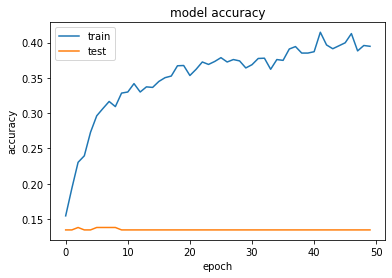

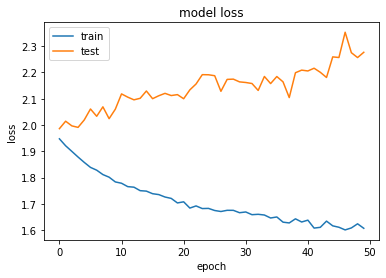

In [20]:
import pandas as pd
history_df = pd.DataFrame(model.history.history)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
top5_trainacc = history_df["accuracy"].sort_values(ascending=False)[:5]
top5_valacc = history_df["val_accuracy"].sort_values(ascending=False)[:5]

In [22]:
Top5results = pd.DataFrame({'train_Top5 Acc': list(top5_trainacc), 'val_Top5 Acc' : list(top5_valacc)})
Top5results

,train_Top5 Acc,val_Top5 Acc
0,0.414559,0.137931
1,0.412644,0.137931
2,0.399617,0.137931
3,0.396552,0.137931
4,0.395785,0.137931


In [23]:
score = model.evaluate(x_valid, y_valid, verbose=1)

290/290 [==============================] - 4s 13ms/step


In [24]:
print(f'Val_loss : {score[0]}\nVal_Acc: {score[1]}')

Val_loss : 2.2765818990510085
Val_Acc: 0.1344827562570572


In [0]:
y_pred = np.argmax(model.predict(x_valid), axis=1)
y_valid = np.argmax(y_valid, axis=1)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print('Confusion Matrix')
print(confusion_matrix(y_valid, y_pred))
print('Classification Report')
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
print(classification_report(y_valid, y_pred, target_names=target_names))

Confusion Matrix
[[ 0 37  0  0  0  0  0]
 [ 0 39  0  0  0  0  0]
 [ 0 40  0  0  0  0  0]
 [ 0 49  0  0  0  0  0]
 [ 0 51  0  0  0  0  0]
 [ 0 39  0  0  0  0  0]
 [ 0 35  0  0  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00        37
     Disgust       0.13      1.00      0.24        39
        Fear       0.00      0.00      0.00        40
       Happy       0.00      0.00      0.00        49
     Neutral       0.00      0.00      0.00        51
         Sad       0.00      0.00      0.00        39
    Surprise       0.00      0.00      0.00        35

    accuracy                           0.13       290
   macro avg       0.02      0.14      0.03       290
weighted avg       0.02      0.13      0.03       290



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(33.0, 0.5, "('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')")

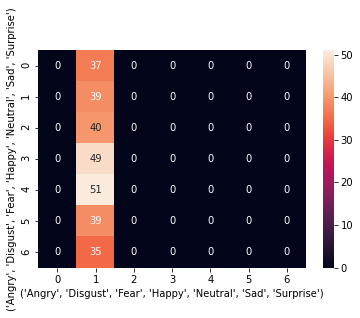

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt="d")
ax.set_xlabel(tuple(target_names))
ax.set_ylabel(tuple(target_names))